In [199]:
import nomic
nomic.login("nk-2LSEn5FB5h04Dn0pFLuZ9jDw7ZaMbPpYPV88wbKKASc")

In [200]:
from nomic import AtlasDataset

In [201]:
rm -rf ~/.nomic/cache/*

In [202]:
dataset = AtlasDataset('hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-05-29')
embds = dataset.maps[0].embeddings.latent
df = dataset.maps[0].data.df

2024-06-07 13:10:27.304 | INFO     | nomic.dataset:__init__:829 - Loading existing dataset `hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-05-29`.


KeyboardInterrupt: 

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
#import seaborn as sns

In [ ]:
congress_persons, tweets_per_congress_person = np.unique(list(df['twitter_lower']), return_counts=True)
congress_persons = list(congress_persons)

average_embds = np.zeros((len(congress_persons), embds.shape[1]))
party_by_congress_person = [-1 for cp in congress_persons]

for i, embd in enumerate(tqdm(embds)):
    congress_person_index = congress_persons.index(df['twitter_lower'][i])
    average_embds[congress_person_index] += embd

    if party_by_congress_person[congress_person_index] == -1:
        party_by_congress_person[congress_person_index] = df['party'][i].lower()

average_embds = np.divide(average_embds, tweets_per_congress_person.reshape(-1, 1))
unique_party_labels, party_counts = np.unique(party_by_congress_person, return_counts=True)


100%|██████████| 3037316/3037316 [00:54<00:00, 55435.61it/s]


In [343]:
congress_person_name = []
for i in range(len(congress_persons)):
    ind = list(df['twitter_lower']).index(congress_persons[i])
    congress_person_name.append(df['name'][ind])


In [344]:
##congress_persons

In [345]:
#congress_person_name

In [346]:
import pandas as pd

# Create a dictionary with the data
data = {'twitter_lower': congress_persons, 'congress_person_name': congress_person_name}

# Create the DataFrame
df_congress = pd.DataFrame(data)

# Append average_embds to the DataFrame
df_congress['average_embds'] = average_embds.tolist()

# Print the resulting DataFrame
#print(df_congress)



       twitter_lower congress_person_name  \
0    austinscottga08        Scott, Austin   
1    benniegthompson    Thompson, Bennie    
2    bettymccollum04      McCollum, Betty   
3       billpascrell   Pascrell Jr., Bill   
4         bobbyscott         Scott, Bobby   
..               ...                  ...   
828   valeriefoushee     Foushee, Valerie   
829     vernbuchanan       Buchanan, Vern   
830     virginiafoxx       Foxx, Virginia   
831   warrendavidson     Davidson, Warren   
832         zachnunn        Nunn, Zachary   

                                         average_embds  
0    [0.019372754845737427, 0.046087814756661405, -...  
1    [0.014717195485089277, 0.031413951614597535, -...  
2    [0.010449477290147103, 0.037694183672034504, -...  
3    [0.024675189226470322, 0.06072079574529742, -0...  
4    [0.0012137936082140502, 0.03904862550233215, -...  
..                                                 ...  
828  [0.019603283038968102, 0.04097513588009313, -0...  
829

In [347]:
df_s= df.drop_duplicates(subset='twitter_lower')
merged_df = df_congress.merge(df_s, on='twitter_lower', how='left')

In [348]:
merged_df = merged_df[merged_df['chamber'] == 'Senate']
df_congress=merged_df


In [351]:
len(df_congress['congress_person_name'])

142

In [349]:
vote_result = [ "Alexander (R-TN), Yea", "Baldwin (D-WI), Nay", "Barrasso (R-WY), Yea", "Bennet (D-CO), Nay", "Blumenthal (D-CT), Nay", "Blunt (R-MO), Yea", "Booker (D-NJ), Nay", "Boozman (R-AR), Yea", "Brown (D-OH), Nay", "Burr (R-NC), Yea", "Cantwell (D-WA), Nay", "Capito (R-WV), Yea", "Cardin (D-MD), Nay", "Carper (D-DE), Nay", "Casey (D-PA), Nay", "Cassidy (R-LA), Yea", "Cochran (R-MS), Yea", "Collins (R-ME), Nay", "Coons (D-DE), Nay", "Corker (R-TN), Yea", "Cornyn (R-TX), Yea", "Cortez Masto (D-NV), Nay", "Cotton (R-AR), Yea", "Crapo (R-ID), Yea", "Cruz (R-TX), Yea", "Daines (R-MT), Yea", "Donnelly (D-IN), Nay", "Duckworth (D-IL), Nay", "Durbin (D-IL), Nay", "Enzi (R-WY), Yea", "Ernst (R-IA), Yea", "Feinstein (D-CA), Nay", "Fischer (R-NE), Yea", "Flake (R-AZ), Yea", "Franken (D-MN), Nay", "Gardner (R-CO), Yea", "Gillibrand (D-NY), Nay", "Graham (R-SC), Yea", "Grassley (R-IA), Yea", "Harris (D-CA), Nay", "Hassan (D-NH), Nay", "Hatch (R-UT), Yea", "Heinrich (D-NM), Nay", "Heitkamp (D-ND), Nay", "Heller (R-NV), Yea", "Hirono (D-HI), Nay", "Hoeven (R-ND), Yea", "Inhofe (R-OK), Yea", "Isakson (R-GA), Yea", "Johnson (R-WI), Yea", "Kaine (D-VA), Nay", "Kennedy (R-LA), Yea", "King (I-ME), Nay", "Klobuchar (D-MN), Nay", "Lankford (R-OK), Yea", "Leahy (D-VT), Nay", "Lee (R-UT), Yea", "Manchin (D-WV), Nay", "Markey (D-MA), Nay", "McCain (R-AZ), Nay", "McCaskill (D-MO), Nay", "McConnell (R-KY), Yea", "Menendez (D-NJ), Nay", "Merkley (D-OR), Nay", "Moran (R-KS), Yea", "Murkowski (R-AK), Nay", "Murphy (D-CT), Nay", "Murray (D-WA), Nay", "Nelson (D-FL), Nay", "Paul (R-KY), Yea", "Perdue (R-GA), Yea", "Peters (D-MI), Nay", "Portman (R-OH), Yea", "Reed (D-RI), Nay", "Risch (R-ID), Yea", "Roberts (R-KS), Yea", "Rounds (R-SD), Yea", "Rubio (R-FL), Yea", "Sanders (I-VT), Nay", "Sasse (R-NE), Yea", "Schatz (D-HI), Nay", "Schumer (D-NY), Nay", "Scott (R-SC), Yea", "Shaheen (D-NH), Nay", "Shelby (R-AL), Yea", "Stabenow (D-MI), Nay", "Strange (R-AL), Yea", "Sullivan (R-AK), Yea", "Tester (D-MT), Nay", "Thune (R-SD), Yea", "Tillis (R-NC), Yea", "Toomey (R-PA), Yea", "Udall (D-NM), Nay", "Van Hollen (D-MD), Nay", "Warner (D-VA), Nay", "Warren (D-MA), Nay", "Whitehouse (D-RI), Nay", "Wicker (R-MS), Yea", "Wyden (D-OR), Nay", "Young (R-IN), Yea" ]

In [350]:
import pandas as pd

# Split each element of vote_result by comma and create a new DataFrame
df_vote_result = pd.DataFrame([result.split(',') for result in vote_result], columns=['Name', 'Vote'])

# Print the resulting DataFrame
print(df_vote_result)


                 Name  Vote
0    Alexander (R-TN)   Yea
1      Baldwin (D-WI)   Nay
2     Barrasso (R-WY)   Yea
3       Bennet (D-CO)   Nay
4   Blumenthal (D-CT)   Nay
..                ...   ...
95      Warren (D-MA)   Nay
96  Whitehouse (D-RI)   Nay
97      Wicker (R-MS)   Yea
98       Wyden (D-OR)   Nay
99       Young (R-IN)   Yea

[100 rows x 2 columns]


In [352]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [356]:
df_vote_result['congress_person_name']=''
df_vote_result['average_embd']=''
df_vote_result['party']=''

In [357]:
## df_vote_result contains 100 rows and 2 columns(Name and Vote) and i will basically add to each row two new columns congress_person_name and average_embd 

for i, row in df_vote_result.iterrows():
    name = row['Name']
    highest_ratio_index = max(range(len(df_congress['congress_person_name'])), key=lambda i: fuzz.ratio(name, df_congress.iloc[i, 1]))

    df_vote_result['congress_person_name'][i] = df_congress.iloc[highest_ratio_index, 1]
    df_vote_result['average_embd'][i] = df_congress.iloc[highest_ratio_index, 2]
    df_vote_result['party'][i] = df_congress.iloc[highest_ratio_index, 4]


/var/folders/rl/pr6f4j2d1_5913_lglcbwszc0000gn/T/ipykernel_40500/967140723.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_vote_result['congress_person_name'][i] = df_congress.iloc[highest_ratio_index, 1]
/var/folders/rl/pr6f4j2d1_591

In [ ]:
## wrong name matching: 
# 33 Flake (R-AZ)@JeffFlake
## 34Franken (D-MN)@alfranken
## 52 Inhofe (R-OK) @JimInhofe
## 66 McCaskill (D-MO)@clairecmc
## Moran (R-KS) @JerryMoran
## Rubio (R-FL)

In [ ]:
#congress_persons

In [ ]:
def print_sorted_names(df_congress,input_string):
    # Compare each entry with the input string using fuzz.ratio and store the ratios in a new column
    df_congress['ratio'] = df_congress['congress_person_name'].apply(lambda x: fuzz.ratio(x, input_string))

    # Sort the DataFrame by the ratio column in descending order
    df_congress = df_congress.sort_values('ratio', ascending=False)

    # Sort the DataFrame by the ratio column in descending order
    sorted_names = df_congress['congress_person_name']

    for name in sorted_names:
        print(name)


In [358]:
df_vote_result.loc[df_vote_result['Name'] == 'Moran (R-KS)','congress_person_name']=df_congress.loc[df_congress['congress_person_name'] == 'Moran, Jerry','congress_person_name'].values
df_vote_result.loc[df_vote_result['Name'] == 'Moran (R-KS)', 'average_embd'] = df_congress.loc[df_congress['congress_person_name'] == 'Moran, Jerry', 'average_embds'].values
df_vote_result.loc[df_vote_result['Name'] == 'Moran (R-KS)', 'party'] = df_congress.loc[df_congress['congress_person_name'] == 'Moran, Jerry', 'party'].values

df_vote_result.loc[df_vote_result['Name'] == 'Moran (R-KS)', :]

,Name,Vote,congress_person_name,average_embd,party
64,Moran (R-KS),Yea,"Moran, Jerry","[0.005169237795330229, 0.037320220896175926, -...",R


In [359]:
df_vote_result.loc[df_vote_result['Name'] == 'Rubio (R-FL)','congress_person_name']=df_congress.loc[df_congress['congress_person_name'] == 'Rubio, Marco','congress_person_name'].values
df_vote_result.loc[df_vote_result['Name'] == 'Rubio (R-FL)', 'average_embd'] = df_congress.loc[df_congress['congress_person_name'] == 'Rubio, Marco', 'average_embds'].values
df_vote_result.loc[df_vote_result['Name'] == 'Rubio (R-FL)', 'party'] = df_congress.loc[df_congress['congress_person_name'] == 'Rubio, Marco', 'party'].values
df_vote_result.loc[df_vote_result['Name'] == 'Rubio (R-FL)', :]

,Name,Vote,congress_person_name,average_embd,party
77,Rubio (R-FL),Yea,"Rubio, Marco","[0.018634630261727098, 0.051763363604275685, -...",R


In [203]:
#print_sorted_names(df_congress,'Flake (R-AZ)')
#print_sorted_names(df_congress,'Franken (D-MN)')
#print_sorted_names(df_congress,'JimInhofe')
#print_sorted_names(df_congress,'McCaskill (D-MO)')
#print_sorted_names(df_congress,'Moran (R-KS)')
print_sorted_names(df_congress,' Rubio (R-FL)')


Rick Scott R-FL
Rubio, Marco
Dick Durbin D-IL
Tommy Tuberville R-AL
Jim Risch R-ID
Mike Rounds R-SD
Pat Roberts R-KS
Mitt Romney R-UT
Shelley Capito R-WV
Harry Reid D-NV
Tammy Duckworth D-IL
Jacky Rosen D-NV
Bill Nelson D-FL
John Barrasso R-WY
Mark Kirk R-IL
Jay Rockefeller D-WV
Wicker, Roger 
Doug Jones D-AL
Murkowski, Lisa
Ben Cardin D-MD
Mark Begich D-AK
Bill Cassidy R-LA
Robert Casey D-PA
Wyden, Ron
Tammy Baldwin D-WI
Bennet, Michael F.
Kamala Harris D-CA
Richard Shelby R-AL
Luther Strange R-AL
Robert Menendez D-NJ
Catherine Masto D-NV
Debbie Stabenow D-MI
Mike Lee R-UT
Ted Cruz R-TX
Mo Cowan D-MA
Hirono, Mazie 
Richard Blumenthal D-CT
Dan Coats R-IN
Tom Udall D-NM
Mike Enzi R-WY
Ben Sasse R-NE
Ricketts, Pete
Tim Scott R-SC
Ed Markey D-MA
Deb Fischer R-NE
Josh Hawley R-MO
Tom Harkin D-IA
Joni Ernst R-IA
Jon Ossoff D-GA
Pat Toomey R-PA
John Thune R-SD
Thom Tillis R-NC
Rob Portman R-OH
Orrin Hatch R-UT
Ron Johnson R-WI
Butler, Laphonza
Gary Peters D-MI
John McCain R-AZ
Bob Corker R-T

In [360]:
remove_list=['Flake (R-AZ)','Franken (D-MN)','McCaskill (D-MO)','Inhofe (R-OK)']
df_vote_result = df_vote_result[~df_vote_result['Name'].isin(remove_list)]
df_vote_result

,Name,Vote,congress_person_name,average_embd,party
0,Alexander (R-TN),Yea,Lamar Alexander R-TN,"[0.008917577819331087, 0.040894072102810715, -...",R
1,Baldwin (D-WI),Nay,Tammy Baldwin D-WI,"[0.005916222317391049, 0.045102929613045045, -...",D
2,Barrasso (R-WY),Yea,John Barrasso R-WY,"[0.007415799613361589, 0.05089761533039042, -0...",R
3,Bennet (D-CO),Nay,Michael Bennet D-CO,"[0.013366598344966413, 0.04945135730294084, -0...",D
4,Blumenthal (D-CT),Nay,Richard Blumenthal D-CT,"[0.02171346876998771, 0.04763744467845487, -0....",D
...,...,...,...,...,...
95,Warren (D-MA),Nay,Elizabeth Warren D-MA,"[0.025008325084977086, 0.059642500546964704, -...",D
96,Whitehouse (D-RI),Nay,Sheldon Whitehouse D-RI,"[0.019815496674384918, 0.04977140520438279, -0...",D
97,Wicker (R-MS),Yea,"Wicker, Roger","[0.012085723624775158, 0.038739765270292284, -...",R
98,Wyden (D-OR),Nay,"Wyden, Ron","[0.008334239019969575, 0.04715428863016057, -0...",D


In [1]:
#df_vote_result
df_vote_result.to_csv('df_vote_result.csv', index=False)

NameError: name 'df_vote_result' is not defined

In [216]:
x = df_vote_result['average_embd']
x = x.values.reshape(-1, 1)
x

array([[list([0.008917577819331087, 0.040894072102810715, -0.17113339121296237, -0.03144406326354488, 0.05413404687272134, 0.023537873626747068, -0.008218976945680554, 0.005923017479920836, 0.05265200193783057, -0.008830644006264068, -0.017260121113662298, 0.012727681728113054, 0.049093852324811074, 0.02211135862335328, 0.01254903868128758, -0.029117720496039622, -0.0015430528330586256, -0.03958800717717201, -0.0131991091754698, 0.019030857968083206, -0.023862979849367767, -0.054036915706608644, -0.04051418673987579, -0.022592383631514966, 0.0655648650134951, 0.02581614056027807, 0.013030422942274956, -0.0019411611660759961, -0.011516769259164875, -0.0005844294773117919, 0.025235070082773002, -0.019737432025297645, 0.001088819918186369, -0.04110238873423038, -0.01982534362002492, -0.04079680594320138, 0.03206527360526514, 0.015757746783746855, 0.010758045455732923, -0.031016266782351223, 0.034533139274838365, 0.015002910556522234, -0.02025114314345259, -0.06614066896709578, 0.051307411

In [243]:
df_vote_result['average_embd'][0]==x[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [244]:
import numpy as np
x = df_vote_result['average_embd'].values
x = np.array([np.array(xi) for xi in x])
x[1]==df_vote_result['average_embd'][1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [362]:
import numpy as np
x = df_vote_result['average_embd'].values
x = np.array([np.array(xi) for xi in x])


In [363]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y=df_vote_result['party']


In [364]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x, y)
lda_embds = LDA.transform(x)
lda_embds

array([[  2.34969072,   0.79135089],
       [ -3.39304819,   1.43259975],
       [  2.90187837,  -0.25571982],
       [ -0.09080053,   0.34764375],
       [ -2.6460693 ,   1.66600755],
       [  2.78110945,   1.28081056],
       [ -3.36432753,  -0.30277927],
       [  2.75977546,   0.82903226],
       [ -1.63152852,  -0.80066891],
       [  1.88329829,  -1.45387951],
       [ -2.53938474,  -0.0389487 ],
       [ -0.74483964,   0.97419701],
       [ -2.89351479,  -0.1383574 ],
       [ -2.29533358,  -0.26402205],
       [ -2.27306871,  -0.02049082],
       [  2.88539201,   0.80373326],
       [  3.37927652,   1.28149573],
       [  2.31263539,  -3.01143839],
       [ -3.12546691,   0.70103424],
       [  2.86795238,   0.09333546],
       [  3.31378222,   0.83711516],
       [ -2.12048894,  -0.0817154 ],
       [  4.74212933,   0.25798247],
       [  2.43647345,  -0.14777214],
       [  2.57486266,   0.23806165],
       [  2.30352721,   0.24541121],
       [ -3.11109334,   0.38393232],
 

In [330]:
x=x[:,0]
x=x.reshape(-1,1)
y = df_vote_result['Vote'].values

In [370]:
x=lda_embds[:,0].reshape(-1,1)
y = df_vote_result['Vote'].values

In [371]:
from sklearn.linear_model import LogisticRegression

model=logreg.fit(x, y)

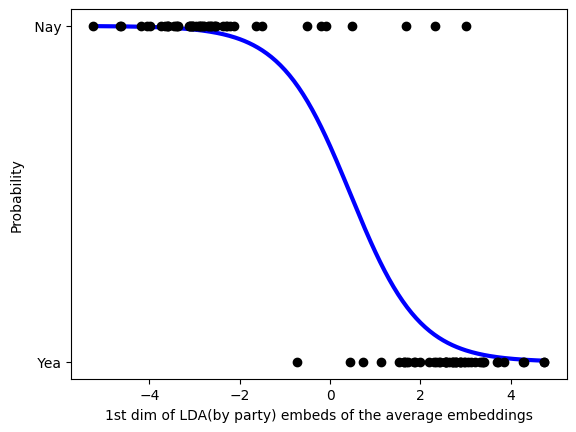

In [373]:
model = LogisticRegression()
model.fit(x, y)

# Generate a range of values for hours studying
X_test = np.linspace(min(x), max(x), 300).reshape(-1, 1)

# Predict probabilities using the logistic regression model
y_prob = model.predict_proba(X_test)[:, 0]

# Plot the data points
plt.scatter(x, y, color='black', zorder=5)

# Plot the logistic regression curve
plt.plot(X_test, y_prob, color='blue', linewidth=3)

# Label the axes and the plot
plt.xlabel('1st dim of LDA(by party) embeds of the average embeddings')
plt.ylabel('Probability')

# Show the plot
plt.show()



In [ ]:
#y_prob

array([0.99940047, 0.9993738 , 0.99934595, 0.99931686, 0.99928647,
       0.99925474, 0.99922159, 0.99918698, 0.99915082, 0.99911306,
       0.99907362, 0.99903243, 0.99898941, 0.99894448, 0.99889755,
       0.99884854, 0.99879736, 0.9987439 , 0.99868806, 0.99862975,
       0.99856885, 0.99850525, 0.99843883, 0.99836946, 0.99829701,
       0.99822135, 0.99814233, 0.99805981, 0.99797363, 0.99788364,
       0.99778965, 0.9976915 , 0.997589  , 0.99748196, 0.99737019,
       0.99725346, 0.99713157, 0.99700429, 0.99687137, 0.99673258,
       0.99658765, 0.99643632, 0.9962783 , 0.9961133 , 0.99594101,
       0.99576112, 0.99557329, 0.99537718, 0.99517243, 0.99495865,
       0.99473545, 0.99450243, 0.99425915, 0.99400517, 0.99374002,
       0.99346323, 0.99317428, 0.99287265, 0.99255779, 0.99222912,
       0.99188607, 0.991528  , 0.99115426, 0.9907642 , 0.9903571 ,
       0.98993224, 0.98948886, 0.98902616, 0.98854334, 0.98803953,
       0.98751385, 0.98696536, 0.98639312, 0.98579611, 0.98517

In [379]:
y_fitted = model.predict(x)

In [380]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_fitted)
print(accuracy)


0.9375
